Click [here](https://tjroginsky.github.io/CMPS-3660-Tutorial/) to view the notebook online.

# Milestone 1

For the CMPS-3660 Final Project, we (Dinuka Malith and Tom Roginsky) plan on working in a group of two. Below are two of the data sets that we are intersted in.

In [24]:
!pip install pycountry
!pip install pycountry-convert
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pycountry
import pycountry_convert as pcc
import numpy
!python3 -m pip install lxml
from bs4 import BeautifulSoup
import requests as rq

In [2]:
df_trade = pd.read_excel("GTA_all_data.xlsx")
df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaN,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaN,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain


For our project, we are looking to explore global economic developments pertaining to trade protectionism. An interesting dataset we came across was one posted by Global Trade Alert, an initiative by the Center for Policy Research which provides full coverage of the trade-discriminatory measures all across the globe. We are interested in observing the trends of these measures over the past few years, how this has evolved from region-to-region, what types of trade discriminatory measures countries have resorted to, and how some of the measures implemented align with the country’s said objectives.
   
The dataset provided by Global Trade Alert provides tons of information that helps us to answer these questions. Starting from 2008, the dataset lists which countries have implemented such measures, along with the countries they are implemented on. It provides the type of the measure – non-tariff or tariff, on what products, and whether the measure is currently in force. GTA also have a unique “color” indicator which states the serious of measure, with red classifying those which certainty discriminates foreign commercial interests, yellow which could potential deter foreign commercial interests, and green which pertain to more liberalizing (i.e. Anti-trade) measures. 
    
As mentioned earlier, this dataset provides an opportunity to pursue one, or many of our said goals. With the rapid global trade developments across the world, ranging from US-China trade war, China’s New Silk Road, and Brexit, it would be interesting to conduct a time-series analysis on the change in the global trade landscape since the 2008 recession. We are currently looking for a data set that matches the one with GTA but goes further back than 2008. Another key question we look to analyze is how the global landscape has evolved since the 2008 financial crises. Part of the severity of the recession in 2008 was linked to “global interconnectedness,” where trouble in the major developed and developing countries had subsequent negative effects on other smaller and more dependent economies. It will be interesting to whether countries have now taken steps to protect themselves from external factors by insulating themselves from the global trade environment, either relying on themselves for the provisions of goods and services or focusing on more “regional” trade developments as opposed to global.

In [89]:
df_energy = pd.read_csv("energy.csv")
df_energy.head()

,State,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Liquefied Petroleum Gases,Consumption.Commercial.Natural Gas,...,Price.Industrial.Coal,Price.Industrial.Distillate Fuel Oil,Price.Industrial.Kerosene,Price.Industrial.Liquefied Petroleum Gases,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Liquefied Petroleum Gases,Price.Transportation.Natural Gas
0,Utah,1960,114689.0,2644.0,2110.0,0.0,0.0,33.0,450.0,10482.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Vermont,1960,0.0,769.0,2434.0,0.0,0.0,245.0,367.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Rhode Island,1960,0.0,210.0,8046.0,0.0,0.0,95.0,224.0,1753.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Michigan,1960,0.0,24324.0,18710.0,0.0,0.0,3206.0,735.0,44506.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Missouri,1960,61027.0,11149.0,6411.0,0.0,0.0,8546.0,4272.0,33826.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We are also considering a data set from the CORGIS data project provided by the U.S. Energy and Information Adminstration. It contains data organized by year and state on the production of coal, as well as the consumption (in BTUs), price, and expenditure of multiple fuel sources in various sectors of the economy. These fuel sources include coal, hydropower, solar, wind, wood, natural gas, etc. Sectors are broken down into commercial, electric power, industrial, residential, transportation, and refinery.
    
We would like to see how different renewable energy initiatives have affected energy consumption in different states. For this we can compare how energy consumption levels change over time with the renewable energy initiatives listed in the Database of State Incentives for Renewables & Efficiency. The DSIRE dataset lists initiatives by state and includes data on the incentives offered/policies enacted, program inception dates, and the goal of the project.

# Milestone 2

In [90]:
df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction,mask,Trade Measure Type,announcement_year
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France,True,Tariff,2008
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates,True,Tariff,2008
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom,True,Tariff,2008
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal,True,Tariff,2008
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain,False,Non-Tariff,2009


In [91]:
df_trade.dtypes

State Act ID                          int64
Intervention ID                       int64
State Act Title                      object
Announcement Date            datetime64[ns]
GTA Evaluation                       object
Currently in force                   object
Inception Date               datetime64[ns]
Removal Date                 datetime64[ns]
Implementing Jurisdiction            object
Intervention Type                    object
MAST chapter                         object
Affected Sectors                     object
Affected Products                    object
Affected Jurisdiction                object
mask                                   bool
Trade Measure Type                   object
announcement_year                     int64
dtype: object

In [92]:
df_trade['Inception Date'] =  pd.to_datetime(df_trade['Inception Date'])
df_trade['Announcement Date'] =  pd.to_datetime(df_trade['Announcement Date'])
df_trade['Removal Date'] =  pd.to_datetime(df_trade['Removal Date'])

In [93]:
df_trade['Announcement Date']

0        2008-12-26
1        2008-12-26
2        2008-12-26
3        2008-12-26
4        2009-03-25
            ...    
343136   2017-01-13
343137   2017-01-13
343138   2017-01-13
343139   2017-01-11
343140   2017-01-09
Name: Announcement Date, Length: 343141, dtype: datetime64[ns]

In [94]:
#df_trade['Implementing Jurisdiction'].unique()

In [95]:

#df_trade['Affected Jurisdiction'].unique()


In [96]:
df_trade["mask"] = (df_trade["Intervention Type"] == "Import tariff") | (df_trade["Intervention Type"] == "Import tariff quota")

In [97]:


df_trade["Trade Measure Type"] = df_trade["mask"].map({
    True : "Tariff",
    False : "Non-Tariff",
})

df_trade.head()


,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction,mask,Trade Measure Type,announcement_year
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France,True,Tariff,2008
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates,True,Tariff,2008
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom,True,Tariff,2008
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal,True,Tariff,2008
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain,False,Non-Tariff,2009


In [98]:
#df_trade["year_bins"] = pd.cut(x=df_trade["Announcement Date"],bins = [])

In [99]:
df_trade["announcement_year"] = df_trade["Announcement Date"].dt.strftime("%Y")

In [100]:
df_trade["announcement_year"] =  pd.to_numeric(df_trade["announcement_year"])
year_tmes_df = df_trade.groupby("announcement_year")["Trade Measure Type"].value_counts().to_frame()

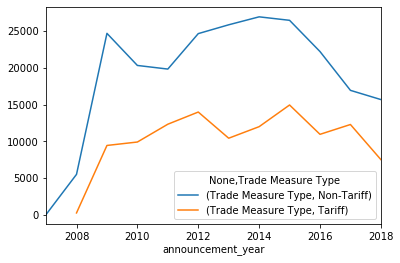

In [101]:
year_tmes_df.unstack(level=1).plot.line()

In [102]:
unstack_year_tmes = year_tmes_df.unstack(level=1)


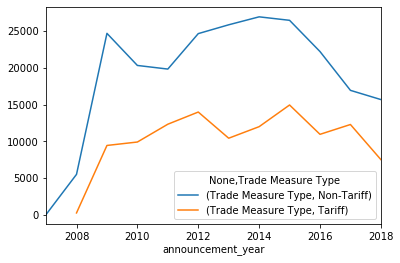

In [103]:
year_tmes_df.unstack(level=1).plot.line()

In [104]:

non_tariff = []
tariff = []
for i in range(1, 23):
    if i % 2 == 0:
        tariff.append(year_tmes_df['Trade Measure Type'][i])
    else:
        non_tariff.append(year_tmes_df['Trade Measure Type'][i])
years = []
for i in range(2008, 2019):
    years.append(i)
    


In [105]:
data = {
    'years': years, 
    'non_tariff': non_tariff, 
    'tariff': tariff }
tar_line_df = pd.DataFrame(data)

In [106]:
tar_line_df

,years,non_tariff,tariff
0,2008,5496,244
1,2009,24697,9433
2,2010,20327,9900
3,2011,19834,12325
4,2012,24662,13983
5,2013,25863,10419
6,2014,26947,11991
7,2015,26473,14942
8,2016,22219,10947
9,2017,16936,12285


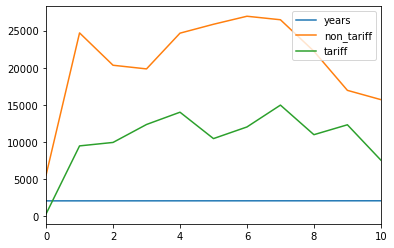

In [107]:
tar_line_df.plot.line()

Text(0.5, 1.0, 'Trade Measures from 2008 throught 2018')

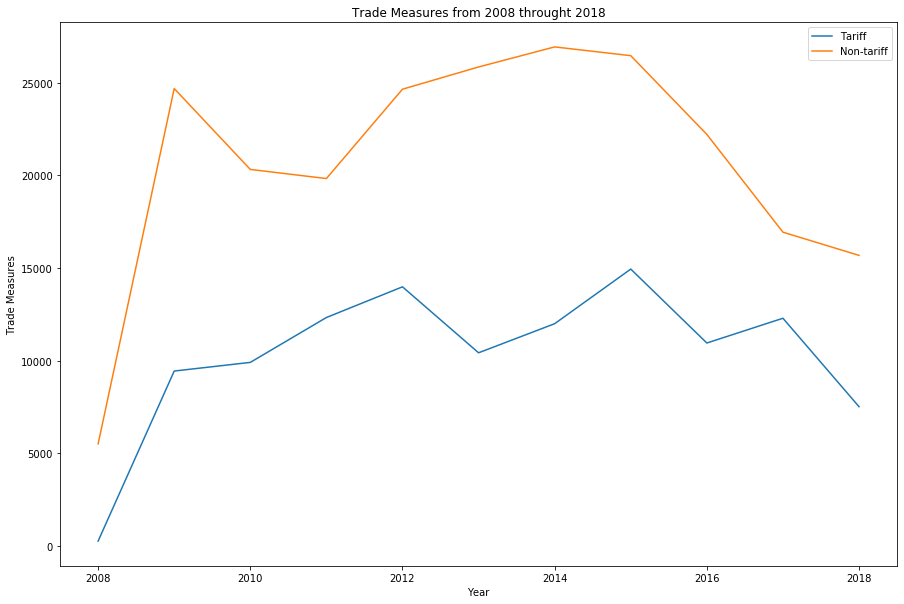

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))

#ax.plot(standard_df[standard_df['franchID'] == b]['yearID'], 
        #\standard_df[standard_df['franchID'] == b]['efficiency'], label=b)
ax.plot(tar_line_df['years'], tar_line_df['tariff'], label='Tariff')
ax.plot(tar_line_df['years'], tar_line_df['non_tariff'], label='Non-tariff')

#ax.plt = year_tmes_df.unstack(level=1).plot.line()
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Trade Measures')
ax.set_title('Trade Measures from 2008 throught 2018')

**Everything below this point is kind of a mess. I got the country bit part working. We have a pie chart of implementing continents, but can't get it to work for affected continents yet.**

In [109]:

x = df_trade['Affected Products'].apply(pd.Series)


In [110]:
x.head()

,0
0,"271012, 271019"
1,"271012, 271019"
2,271019
3,"271012, 271019"
4,"731815, 841510, 841581, 841590, 843360, 852349..."


In [111]:

country_code = pcc.country_name_to_country_alpha2("China", cn_name_format="default")
print(country_code)

CN


In [112]:
df_trade.head()

,State Act ID,Intervention ID,State Act Title,Announcement Date,GTA Evaluation,Currently in force,Inception Date,Removal Date,Implementing Jurisdiction,Intervention Type,MAST chapter,Affected Sectors,Affected Products,Affected Jurisdiction,mask,Trade Measure Type,announcement_year
0,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",France,True,Tariff,2008
1,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",United Arab Emirates,True,Tariff,2008
2,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,271019,United Kingdom,True,Tariff,2008
3,53,17542,Zambia: Increase in fuel import duty to 25% fr...,2008-12-26,Red,yes,2008-12-26,NaT,Zambia,Import tariff,Tariff measures,333,"271012, 271019",Portugal,True,Tariff,2008
4,92,20128,Argentina: Non-automatic licensing requirement...,2009-03-25,Red,yes,2009-03-25,NaT,Argentina,Import licensing requirement,E1 Non-automatic import-licensing procedures o...,"429, 439, 441, 476, 479, 381","731815, 841510, 841581, 841590, 843360, 852349...",Spain,False,Non-Tariff,2009


In [113]:
pcc.country_name_to_country_alpha2("China", cn_name_format="default")

'CN'

In [116]:
for a, b  in enumerate(pycountry.countries):
    print(b)

Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')
Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')
Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola')
Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660')
Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248')
Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania')
Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra')
Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784')
Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic')
Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia')
Country(alpha_2='AS', alpha_3='ASM', name='American Samoa', n

In [117]:
df_trade["Implementing Jurisdiction"].unique()

array(['Zambia', 'Argentina', 'Ukraine', 'Russia',
       'United States of America', 'United Kingdom', 'Malaysia',
       'Netherlands', 'Lithuania', 'Poland', 'Ireland', 'Italy', 'Latvia',
       'Spain', 'Sweden', 'Portugal', 'Slovakia', 'Slovenia', 'Romania',
       'Czechia', 'Austria', 'Denmark', 'Cyprus', 'Belgium', 'Bulgaria',
       'Estonia', 'Germany', 'France', 'Hungary', 'Greece', 'Finland',
       'Indonesia', 'Japan', 'India', 'Philippines', 'Vietnam',
       'Australia', 'Ecuador', 'Iraq', 'Kuwait', 'United Arab Emirates',
       'Republic of Korea', 'Kazakhstan', 'South Africa', 'Botswana',
       'Thailand', 'Saudi Arabia', 'Bosnia & Herzegovina', 'Luxembourg',
       'Croatia', 'China', 'Switzerland', 'Kenya', 'Belarus', 'Canada',
       'Namibia', 'Ghana', 'Republic of the Sudan', 'Mexico', 'Zimbabwe',
       'Egypt', 'New Zealand', 'Chinese Taipei', 'Nigeria', 'Ivory Coast',
       'Mongolia', 'Brazil', 'Lebanon', 'Syria', 'Tanzania', 'Uganda',
       'Rwanda', 'Jo

In [118]:
df_trade["Implementing Jurisdiction"].replace({"Republic of Korea": "Korea, Republic of", 
                                               "Bosnia & Herzegovina": "Bosnia and Herzegovina", 
                                               "Chinese Taipei": "Taiwan", "Trinidad & Tobago": "Trinidad and Tobago", 
                                              "US Virgin Islands": "Virgin Islands, U.S.", 
                                              "DR Congo": "Congo, The Democratic Republic of the", 
                                              "Lao": "Lao People's Democratic Republic",
                                              "Sao Tome & Principe": "Sao Tome and Principe",
                                              "Antigua & Barbuda": "Antigua and Barbuda",
                                              "Saint Kitts & Nevis": "Saint Kitts and Nevis",
                                              "Saint Vincent & the Grenadines": "Saint Vincent and the Grenadines"}, 
                                              inplace=True)

df_trade["Affected Jurisdiction"].replace({"Republic of Korea": "Korea, Republic of", 
                                               "Bosnia & Herzegovina": "Bosnia and Herzegovina", 
                                               "Chinese Taipei": "Taiwan", "Trinidad & Tobago": "Trinidad and Tobago", 
                                              "US Virgin Islands": "Virgin Islands, U.S.", 
                                              "DR Congo": "Congo, The Democratic Republic of the", 
                                              "Lao": "Lao People's Democratic Republic",
                                              "Sao Tome & Principe": "Sao Tome and Principe",
                                              "Antigua & Barbuda": "Antigua and Barbuda",
                                              "Saint Kitts & Nevis": "Saint Kitts and Nevis", "U.S.": "United States of America",
                                              "Saint Vincent & the Grenadines": "Saint Vincent and the Grenadines",}, 
                                              inplace=True)



In [119]:
df_trade["Implementing Jurisdiction"].apply(lambda x: 
                                            pcc.country_alpha2_to_continent_code(pcc.country_name_to_country_alpha2(x, cn_name_format="default")))



0         AF
1         AF
2         AF
3         AF
4         SA
          ..
343136    NA
343137    NA
343138    NA
343139    NA
343140    NA
Name: Implementing Jurisdiction, Length: 343141, dtype: object

In [120]:
df_trade['impl_continent'] = df_trade["Implementing Jurisdiction"].apply(lambda x: 
                                            pcc.country_alpha2_to_continent_code(pcc.country_name_to_country_alpha2(x, cn_name_format="default")))

#df_trade['aff_continent'] = df_trade["Affected Jurisdiction"].apply(lambda x: 
                                            #pcc.country_alpha2_to_continent_code(pcc.country_name_to_country_alpha2(x, cn_name_format="default")))


In [ ]:
df_trade['aff_continent'] = df_trade["Affected Jurisdiction"].apply(lambda x: 
                                            pcc.country_alpha2_to_continent_code(pcc.country_name_to_country_alpha2(x, cn_name_format="default")))


In [ ]:
#df_trade['continent'].plot.pie


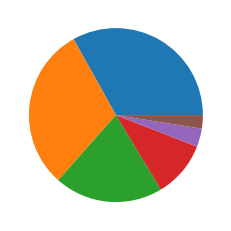

In [127]:
plt.pie(df_trade['impl_continent'].value_counts())
plt.show()

In [ ]:
df_trade["Affected Jurisdiction"].apply(lambda x: pcc.country_name_to_country_alpha3(x, cn_name_format="default"))


In [ ]:
df_trade["Affected Jurisdiction"].unique()

In [ ]:
df_trade

In [ ]:
df_trade.drop(inplace=True, columns=['continent'])

In [ ]:
df_trade

In [25]:
r = rq.get('https://www.globaltradealert.org/sectors')

In [128]:
r = rq.get('https://www.globaltradealert.org/sectors')
bisque = BeautifulSoup(r.text, 'html.parser')
crabby = bisque.prettify()
sector_lists = bisque.find("ul", class_="list-unstyled sector_search")
bisque.find("ul", class_="list-unstyled sector_search")

<ul class="list-unstyled sector_search">
<li id="sector_011" name="cereals"><span>011</span><a href="https://www.globaltradealert.org/sector/011">Cereals</a></li>
<li id="sector_012" name="vegetables"><span>012</span><a href="https://www.globaltradealert.org/sector/012">Vegetables</a></li>
<li id="sector_013" name="fruits and nuts"><span>013</span><a href="https://www.globaltradealert.org/sector/013">Fruits &amp; nuts</a></li>
<li id="sector_014" name="oilseeds and oleaginous fruits"><span>014</span><a href="https://www.globaltradealert.org/sector/014">Oilseeds &amp; oleaginous fruits</a></li>
<li id="sector_015" name="edible roots and tubers with high starch or inulin content"><span>015</span><a href="https://www.globaltradealert.org/sector/015">Edible roots &amp; tubers with high starch or inulin content</a></li>
<li id="sector_016" name="stimulant, spice and aromatic crops"><span>016</span><a href="https://www.globaltradealert.org/sector/016">Stimulant, spice &amp; aromatic crops</a

In [49]:
sector_li = sector_lists.find_all("li")
sector_li

[<li id="sector_011" name="cereals"><span>011</span><a href="https://www.globaltradealert.org/sector/011">Cereals</a></li>,
 <li id="sector_012" name="vegetables"><span>012</span><a href="https://www.globaltradealert.org/sector/012">Vegetables</a></li>,
 <li id="sector_013" name="fruits and nuts"><span>013</span><a href="https://www.globaltradealert.org/sector/013">Fruits &amp; nuts</a></li>,
 <li id="sector_014" name="oilseeds and oleaginous fruits"><span>014</span><a href="https://www.globaltradealert.org/sector/014">Oilseeds &amp; oleaginous fruits</a></li>,
 <li id="sector_015" name="edible roots and tubers with high starch or inulin content"><span>015</span><a href="https://www.globaltradealert.org/sector/015">Edible roots &amp; tubers with high starch or inulin content</a></li>,
 <li id="sector_016" name="stimulant, spice and aromatic crops"><span>016</span><a href="https://www.globaltradealert.org/sector/016">Stimulant, spice &amp; aromatic crops</a></li>,
 <li id="sector_017" n

In [72]:
len(sector_li)

329

In [75]:
sectorIDs = []
sectorNames = []

for i in range(0, 329):
    sectorIDs.append(sector_li[i]['id'][7:])
    sectorNames.append(sector_li[i]['name'])
    

In [78]:
sector_df = pd.DataFrame({'sectorID': sectorIDs, 'sector': sectorNames})
sector_df 

,sectorID,sector
0,011,cereals
1,012,vegetables
2,013,fruits and nuts
3,014,oilseeds and oleaginous fruits
4,015,edible roots and tubers with high starch or in...
5,016,"stimulant, spice and aromatic crops"
6,017,pulses (dried leguminous vegetables)
7,018,sugar crops
8,019,"forage products, fibre crops, plants used in p..."
9,021,live animals


In [88]:
len(df_trade['Affected Sectors'].unique())

48225

AttributeError: module 'pycountry' has no attribute 'continent'